In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setup Initial Data

Randomly generate the training data and create our (x, y) values accordingly

In [0]:
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x +  np.random.rand(100, 1)

Let's plot our newly generated values

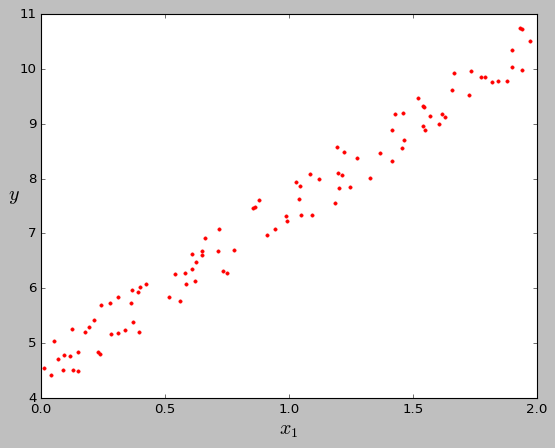

In [0]:
plt.style.use('classic')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(x, y, "r.")
plt.show()

# Begin Gradient Descent


Create our parameters for our mini-batch gradient descent.
This involves setting up the number of epochs we will run, our learning rate, and our batch size

In [0]:
# Number of epochs
epochs = 20
# Learning rate
lr = 0.01
# Batch size
batch_size = 5

We also need to setup our weights for this. We will be using 2 weights and (with our bias value) will need to create a 3x1-sized vector

In [0]:
# Initial weight
weight = np.random.randn(3, 1)
weight_path_mgd = [weight]

# Print out the weight just to check
print(weight)
print(weight_path_mgd)

[[-0.68002472]
 [ 0.2322537 ]
 [ 0.29307247]]
[array([[-0.68002472],
       [ 0.2322537 ],
       [ 0.29307247]])]


To run our gradient descent, we will first append a bias value to our data. 
With how the function has been modified, one should be able to run this with more than one weight

In [0]:
# Append our bias, b, to each row of data
x_b = np.column_stack([np.ones((100, 1)), x, y])

for epoch in range(epochs):
  shuffled_indices = np.random.permutation(100)
  x_shuffled = x_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, 100, batch_size):
    xi = x_shuffled[i: i + batch_size]
    yi = y_shuffled[i: i + batch_size]
    gradient = 1 / (batch_size * xi.T.dot(xi.dot(weight) - yi))
    weight -= lr * gradient
    weight_path_mgd.append(weight)

In [0]:
weight_path_mgd[-1]

array([[-0.65117856],
       [ 0.26368297],
       [ 0.29694824]])

In [1]:
# Graph our predicted values
x_prediction = 2 * np.random.rand(100 ,1)
y_prediction = 3 * x_prediction + np.random.rand(100, 1)
z_prediction = x_prediction + y_prediction
val = np.column_stack([np.ones((100, 1)), x_prediction, y_prediction])
zi_prediction = val.dot(weight)


fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x_prediction, y_prediction, z_prediction, c = 'red')
ax.scatter(x_prediction, y_prediction, zi_prediction, c = 'blue')
ax.view_init(20, 80)

NameError: ignored